In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    return df

In [5]:
df = wrangle(r"C:\Users\HP\Desktop\New folder\Levels_Fyi_Salary_Data.csv")
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


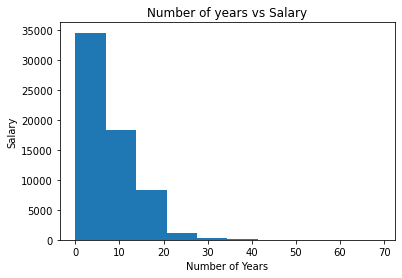

In [6]:
plt.hist(df["yearsofexperience"])
plt.xlabel("Number of Years")
plt.ylabel("Salary")
plt.title("Number of years vs Salary");

In [7]:
features = ["yearsofexperience"]
X_train = df[features]
target = "basesalary"
y_train = df[target]


In [8]:
y_mean = y_train.mean()
y_mean

136687.28129689346

In [9]:
y_pred_baseline = [y_mean]*len(y_train)
y_pred_baseline[:5]

[136687.28129689346,
 136687.28129689346,
 136687.28129689346,
 136687.28129689346,
 136687.28129689346]

In [10]:
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)
print("Mean salary:",round(y_mean,2))
print("mae baseline:",round(mae_baseline,2))
#our models mae should be less than the mae baseline

Mean salary: 136687.28
mae baseline: 43392.03


In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred_training = model.predict(X_train)

In [14]:
mae_training = mean_absolute_error(y_train,y_pred_training)

In [15]:
mae_training

39119.507448681055

In [17]:
#since the mae_training is less than the mae_baseline,thus our model is on the right track.
#COMMUNICATION
intercept = round(model.intercept_,2)
print("Model intercept:",intercept)
coefficient = round(model.coef_[0],2)
print("Model coefficient:",coefficient)
#Linear Regression equation
print(f"base_salary={intercept}+{coefficient}*yearsofexperience")

Model intercept: 108342.66
Model coefficient: 3934.49
base_salary=108342.66+3934.49*yearsofexperience


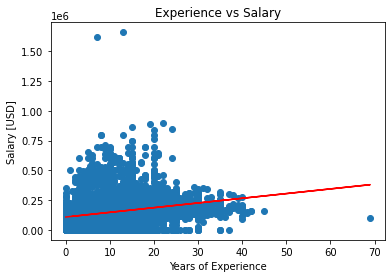

In [18]:
plt.plot(X_train,model.predict(X_train),color="r",label="Linear Model")
plt.scatter(x=df["yearsofexperience"],y=df["basesalary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary [USD]")
plt.title("Experience vs Salary");